In this article, we are going to get hands-on experience with visual exploration of data using popular libraries such as pandas, matplotlib and seaborn.


#### Article outline
1. Dataset
2. Univariate visualization
    - 2.1 Quantitative features
    - 2.2 Categorical and binary features
3. Multivariate visualization
    - 3.1 Quantitative–Quantitative
    - 3.2 Quantitative–Categorical
    - 3.3 Categorical–Categorical
4. Whole dataset
    - 4.1 Naive approach
    - 4.2 Dimensionality reduction
    - 4.2 t-SNE

### 1. Dataset

In [105]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

# graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [106]:
df = pd.read_csv('../data/telecom_churn.csv')

In [107]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...    total eve calls  total eve charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

### 2. Univariate Visualization 
 A univariate plot shows the data and summarizes its distribution. 
 Univariate analysis looks at one variable at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

#### 2.1 Quantitative features

Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers and usually express a count or a measurement.

##### Histogram and density plots
The easiest way to take a look at the distribution of a numerical variable is to plot its histogram using the DataFrame's method hist().

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1090f1780>,
      dtype=object)

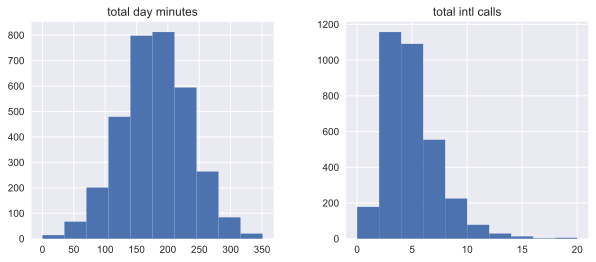

In [4]:
features = ['total day minutes', 'total intl calls']
df[features].hist(figsize=(10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1096baf98>,
      dtype=object)

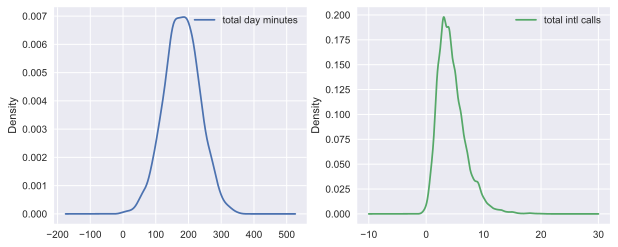

In [5]:
df[features].plot(kind='density', subplots=True, layout=(1,2),sharex=False, figsize=(10,4))

/Users/aida/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


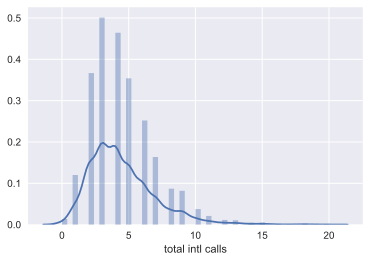

In [6]:
sns.distplot(df['total intl calls']);

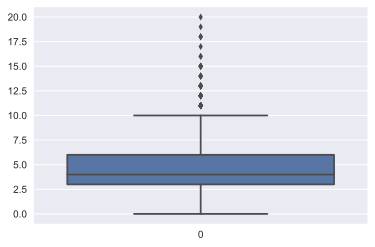

In [7]:
sns.boxplot(data=df['total intl calls'])

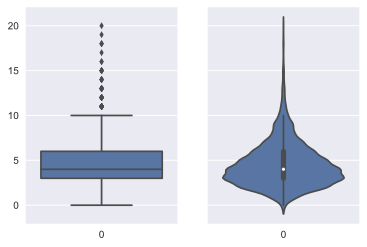

In [8]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(6,4))
sns.boxplot(data=df['total intl calls'], ax = axes[0]);
sns.violinplot(data=df['total intl calls'], ax=axes[1]);

In [9]:
df[features].describe()

total day minutes  total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

#### 2.2 Categorical and binary features

In [10]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

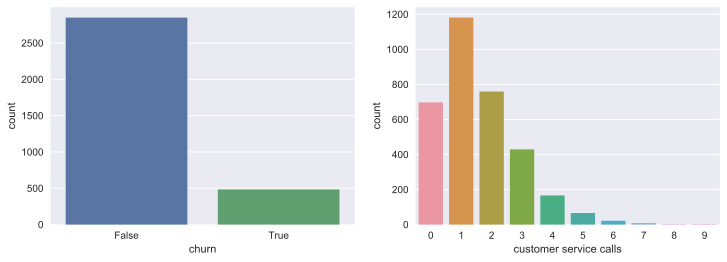

In [11]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='churn', data=df, ax=axes[0]);
sns.countplot(x='customer service calls', data=df, ax=axes[1]);

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:

                                                Histograms are best suited for looking at the distribution of numerical variables while bar plots are used for categorical features.
The values on the X-axis in the histogram are numerical; a bar plot can have any type of values on the X-axis: numbers, strings, booleans.

# 3. Multivariate visualization
Multivariate plots allow us to see relationships between two and more different variables, all in one figure.

### 3.1 Quantitative–Quantitative

**Correlation Matrix**

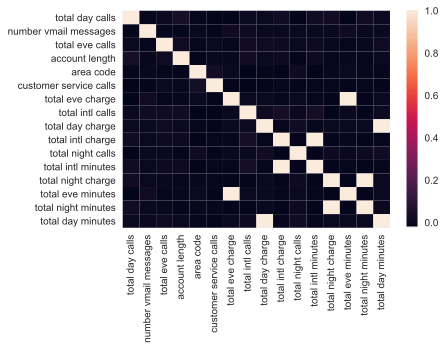

In [12]:
# Drop non-numerical variables
numerical = list(set(df.select_dtypes(include='number')))

# calculate and plot
corr_mtrx = df[numerical].corr()
sns.heatmap(corr_mtrx)

From the colored correlation matrix generated above, we can see that there are 4 variables such as Total day charge that have been calculated directly from the number of minutes spent on phone calls (Total day minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:

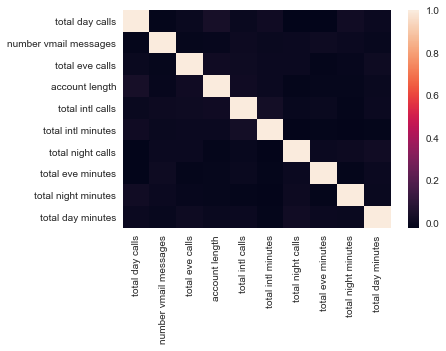

In [22]:
numerical = list(set(numerical) - set(['total day charge', 'total intl charge',
                                       'total night charge', 'total eve charge', 'area code', 'customer service calls']))
correlation_matrix = df[numerical].corr()
sns.heatmap(correlation_matrix)

**Scatter Plots** <br>
The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space. Scatter plots in 3D are also possible.

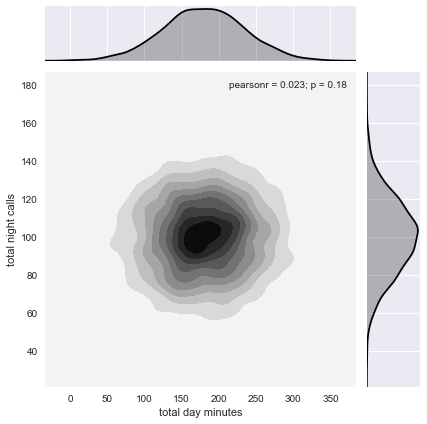

In [23]:
sns.jointplot('total day minutes', 'total night calls', data=df, kind='kde', color='k')

**Scatterplot matrix**

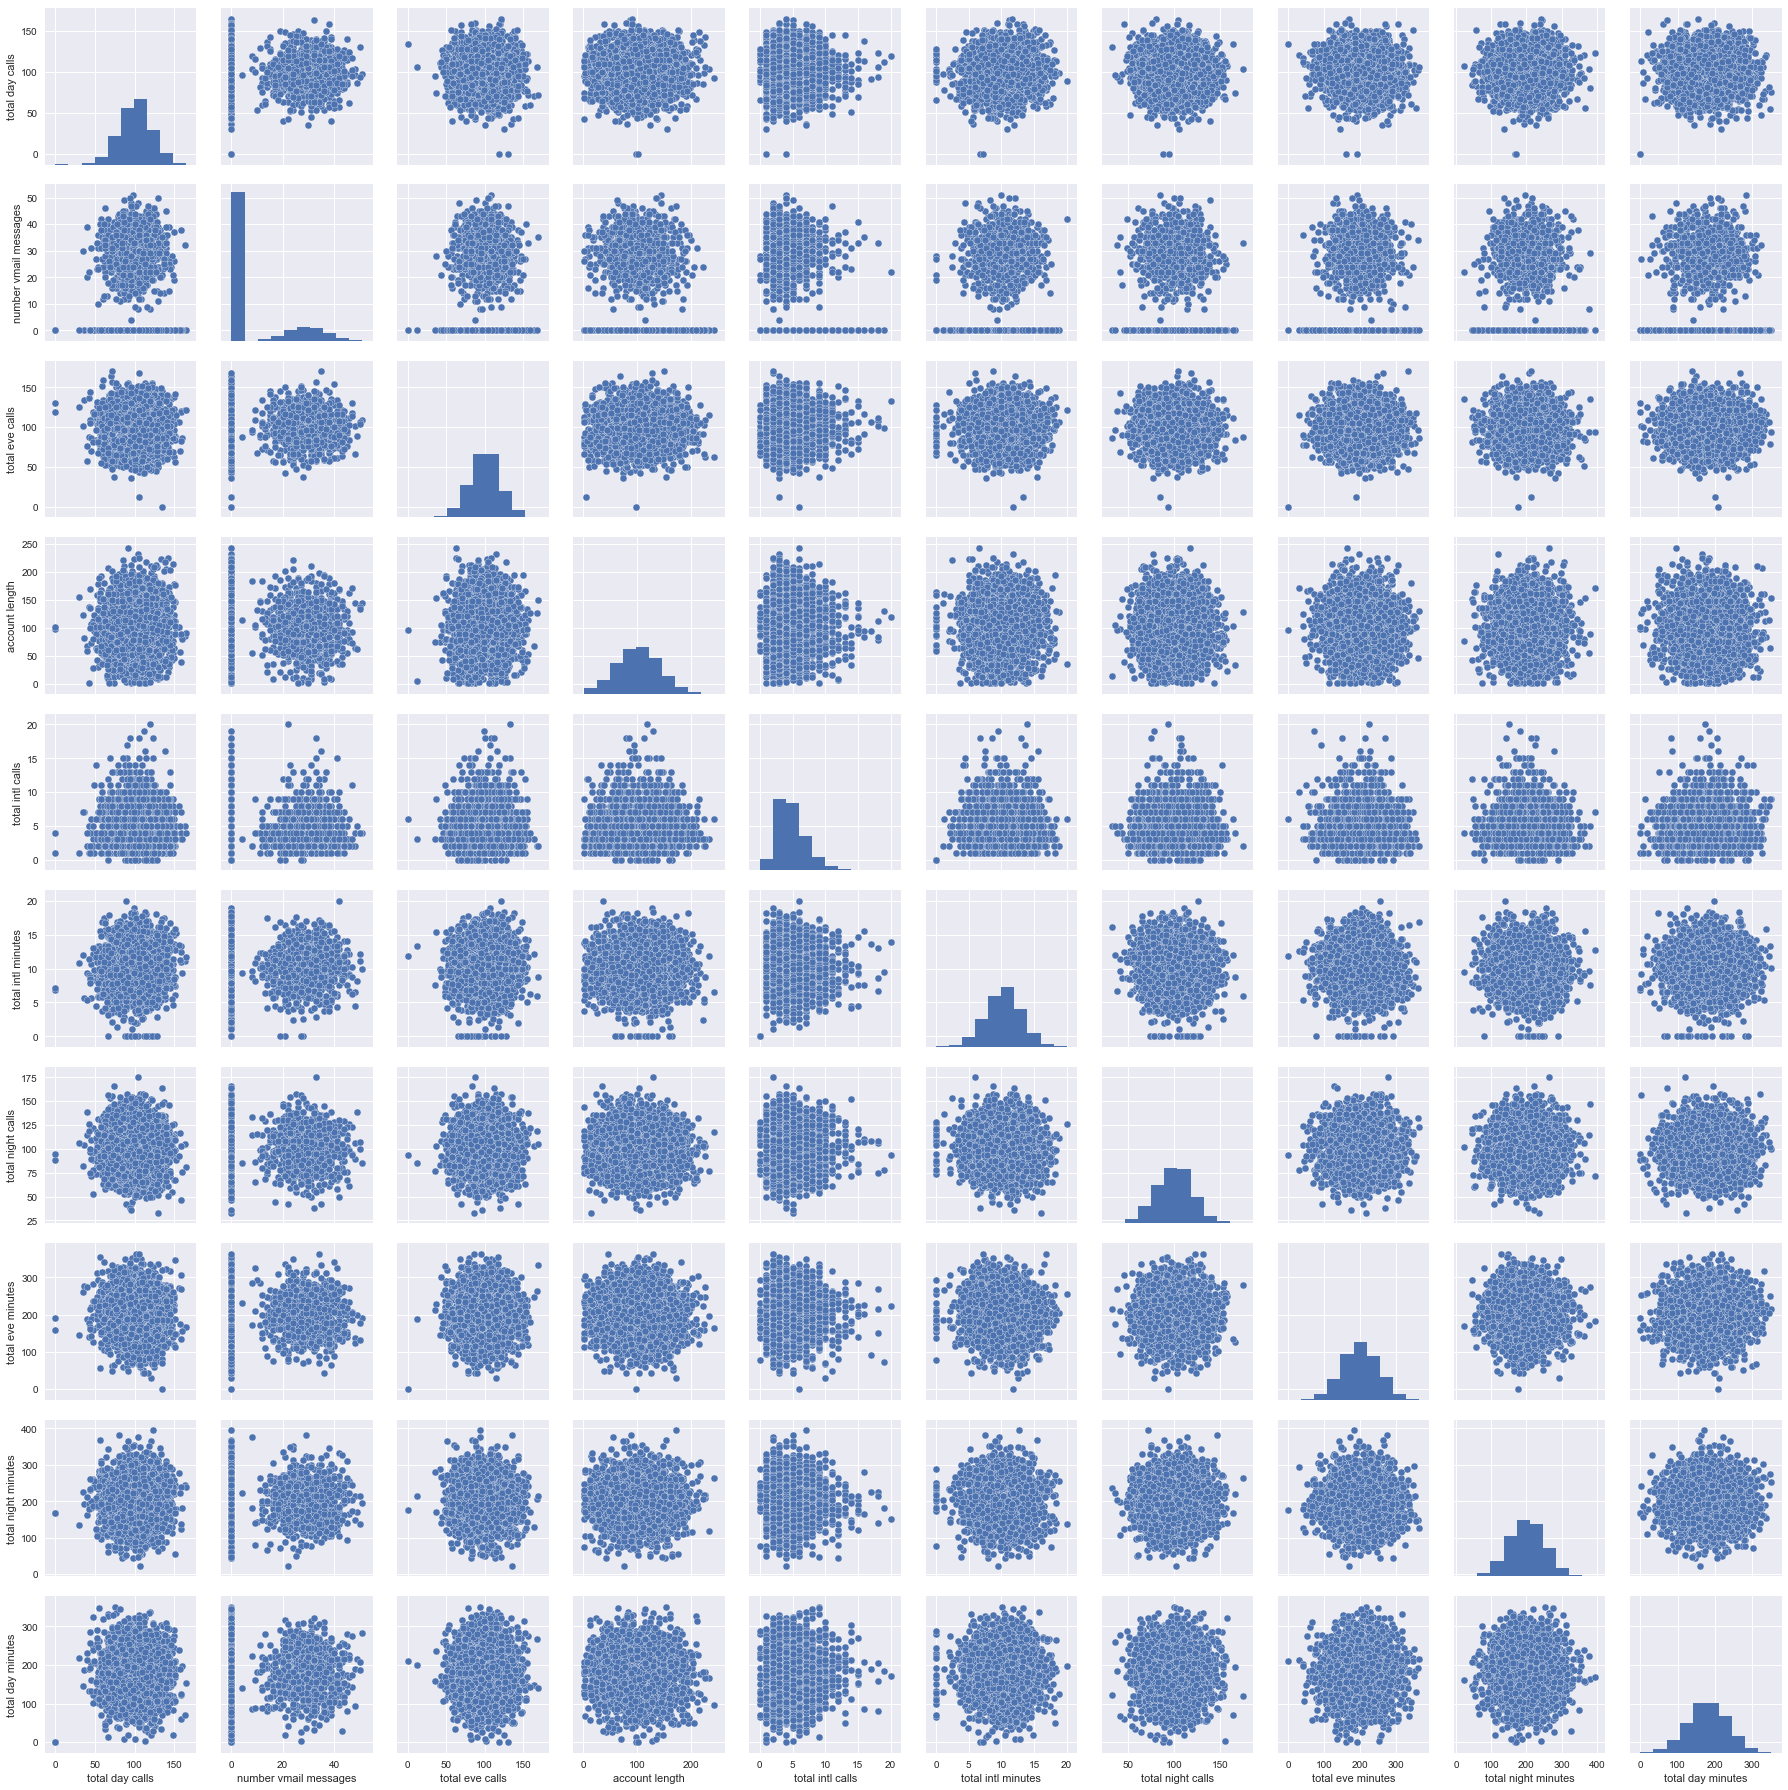

In [24]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])

### 3.2 Quantitative - Categorical

Let's see how the input variables are related to the target variable Churn.

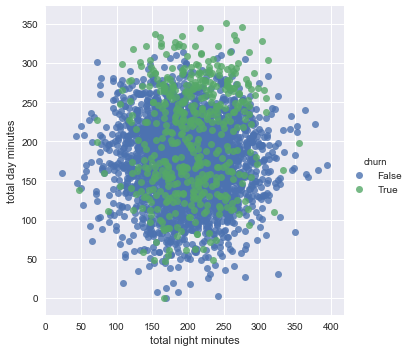

In [28]:
sns.lmplot('total night minutes', 'total day minutes', data=df, hue='churn', fit_reg=False)

It seems that our small proportion of disloyal customers lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night. But this is not absolutely clear, and we won't make any definitive conclusions from this chart.

Now, let’s create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (Churn=False) and those who left (Churn=True).

In [29]:
numerical.append('customer service calls')

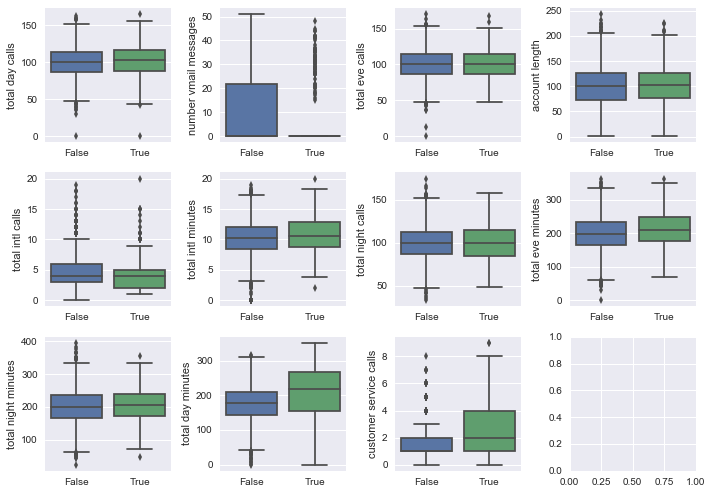

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,7))

for idx, feat in enumerate(numerical):
    ax = axes[int(idx/4), idx%4]
    sns.boxplot(x='churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();
    

In [31]:
?plt.subplots

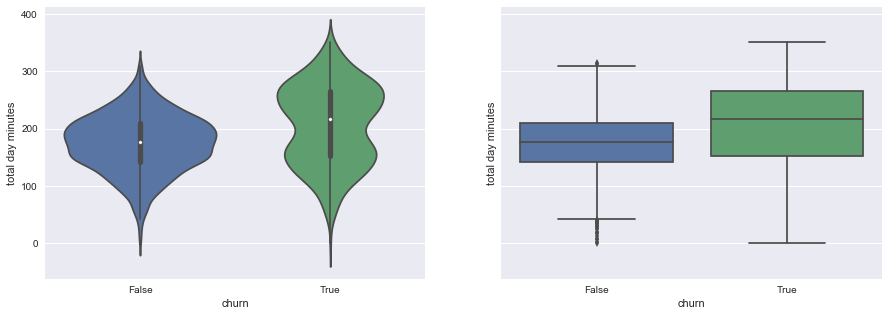

In [42]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))

sns.boxplot(x='churn', y='total day minutes', data=df, ax=axes[1])
sns.violinplot(x='churn', y='total day minutes', data=df, ax=axes[0])


Disloyal customers tend to talk on the phone more.

When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the seaborn library called catplot(). For example, let's visualize the interaction between Total day minutes and two categorical variables in the same plot:

**Categorical - Categorical**

Let's look at the distribution of the number of calls to the customer service, again using a count plot. This time, let's also pass the parameter hue=Churn that adds a categorical dimension to the plot:

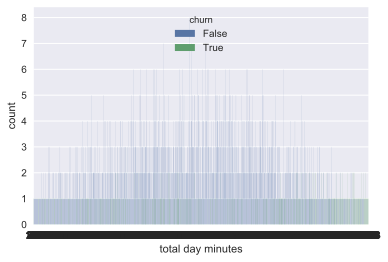

In [54]:
sns.countplot(x='total day minutes', hue='churn', data=df)

Now, let's look at the relationship between Churn and the binary features, International plan and Voice mail plan.

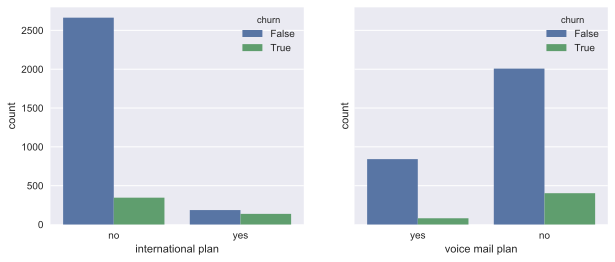

In [59]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10,4))

sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0])
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1])

In [60]:
pd.crosstab(df['state'], df['churn']).T

state  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL ...  SD  TN  TX  UT  VA  VT  WA  \
churn                                         ...                               
False  49  72  44  60  25  57  62  49  52  55 ...  52  48  54  62  72  65  52   
True    3   8  11   4   9   9  12   5   9   8 ...   8   5  18  10   5   8  14   

state  WI  WV  WY  
churn              
False  71  96  68  
True    7  10   9  

[2 rows x 51 columns]

In [64]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

state        NV        WA        ME    ...           RI        WI        IL  \
mean   0.212121  0.212121  0.209677    ...     0.092308  0.089744  0.086207   

state        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

# 4. Whole Dataset

One of the well-known dimensionality reduction methods is Principal Component Analysis (PCA), which we will study later in this course. Its limitation is that it is a linear algorithm that implies certain restrictions on the data.

There are also many non-linear methods, collectively called Manifold Learning. One of the best-known of them is t-SNE.



**4.3 t-SNE**

In [66]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [113]:
X = df.drop(['churn', 'state', 'phone number'], axis=1)
X['international plan'] = X['international plan'].map({'yes': 1, 'no': 0})
X['voice mail plan'] = X['voice mail plan'].map({'yes': 1, 'no': 0})
X.head()

account length  area code  international plan  voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

We also need to normalize the data. For this, we will subtract the mean from each variable and divide it by its standard deviation. All of this can be done with StandardScaler.

In [114]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [117]:
%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


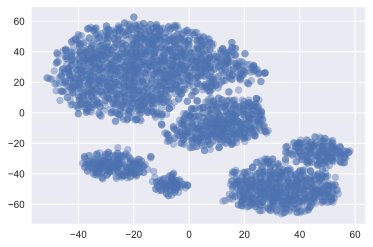

In [120]:
plt.scatter(tsne_repr[:,0], tsne_repr[:,1], alpha=.4)

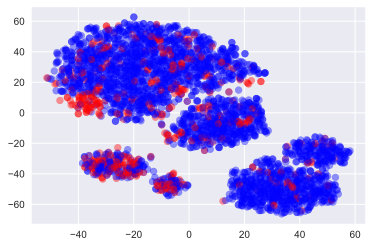

In [122]:
plt.scatter(tsne_repr[:,0], tsne_repr[:,1], c=df['churn'].map({False: 'blue', True: 'red'}) , alpha=.4)

We can see that customers who churned are concentrated in a few areas of the lower dimensional feature space.

To better understand the picture, we can also color it with the remaining binary features: International Plan and Voicemail. Orange dots here indicate instances that are positive for the corresponding binary feature.

Now it is clear that, for example, many dissatisfied customers who canceled their subscription are crowded together in the most south-west cluster that represents the people with the international plan but no voice mail.

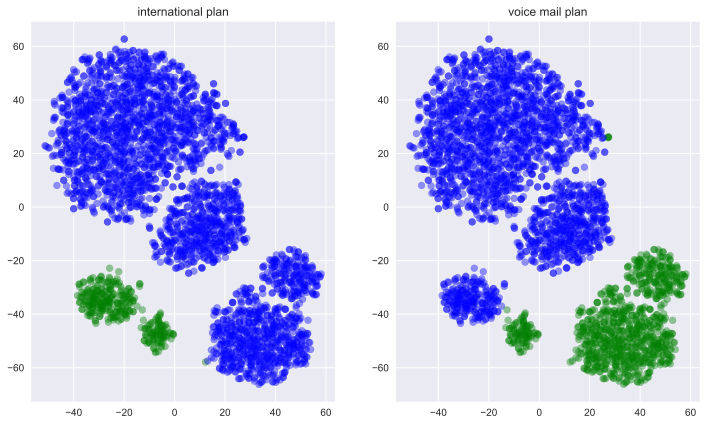

In [128]:
_, axes = plt.subplots(1, 2, figsize=(12, 7))

for i, name in enumerate(['international plan', 'voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df[name].map({'yes': 'g', 'no':'blue'}), alpha=.4);
    axes[i].set_title(name);